In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_pickle('../../data/county_level/full_df.pkl')
df.head()

In [ ]:
identifying_fields = ['State Abbreviation', 'Name', 'Release Year']
independent_fields = ['Unemployment raw value', 'Income inequality raw value']
dependent_fields = ['Poor mental health days raw value', 'Deaths']
filtered_df = df[identifying_fields + independent_fields + dependent_fields]
filtered_df.head(n=20)

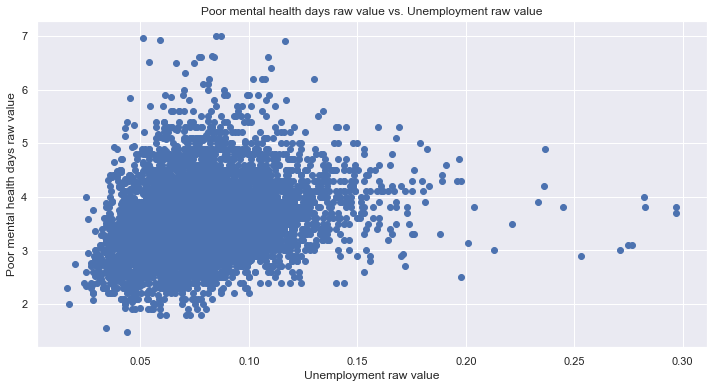

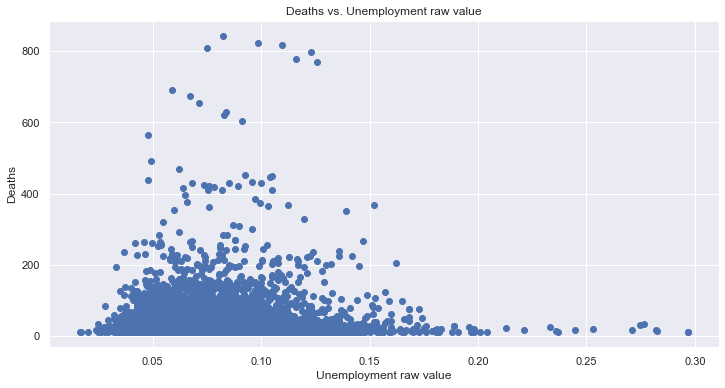

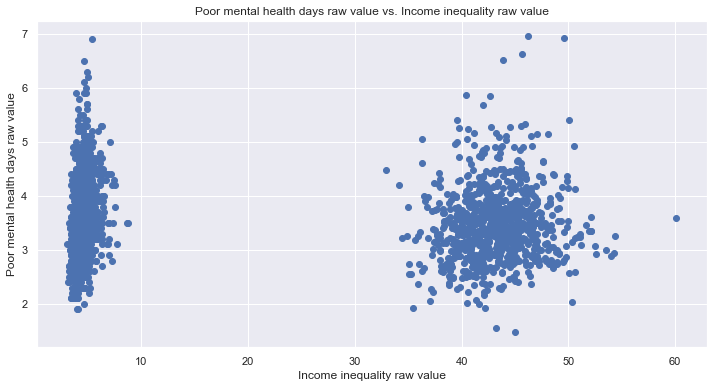

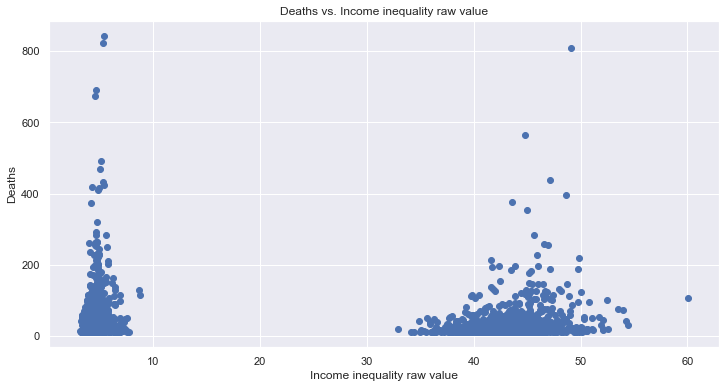

In [77]:
sns.set_theme()
for i, i_field in enumerate(independent_fields):
    for j, d_field in enumerate(dependent_fields):
        plt.figure(i * len(dependent_fields) + j, figsize=(12, 6))
        field_df = filtered_df[[i_field, d_field]].dropna()
        x = field_df[i_field].astype(float).to_numpy()
        y = field_df[d_field].astype(float).to_numpy()
        plt.scatter(x, y)
        plt.title('{} vs. {}'.format(d_field, i_field))
        plt.ylabel(d_field)
        plt.xlabel(i_field)
        plt.show()

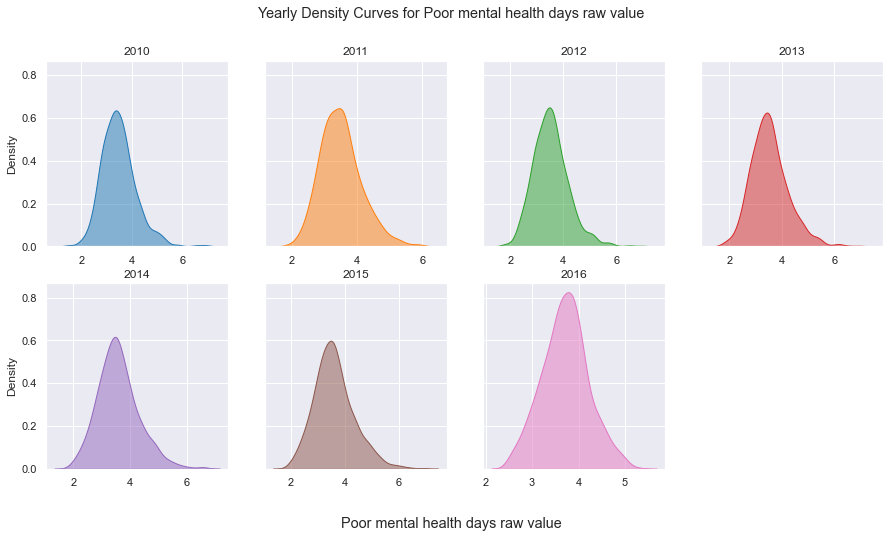

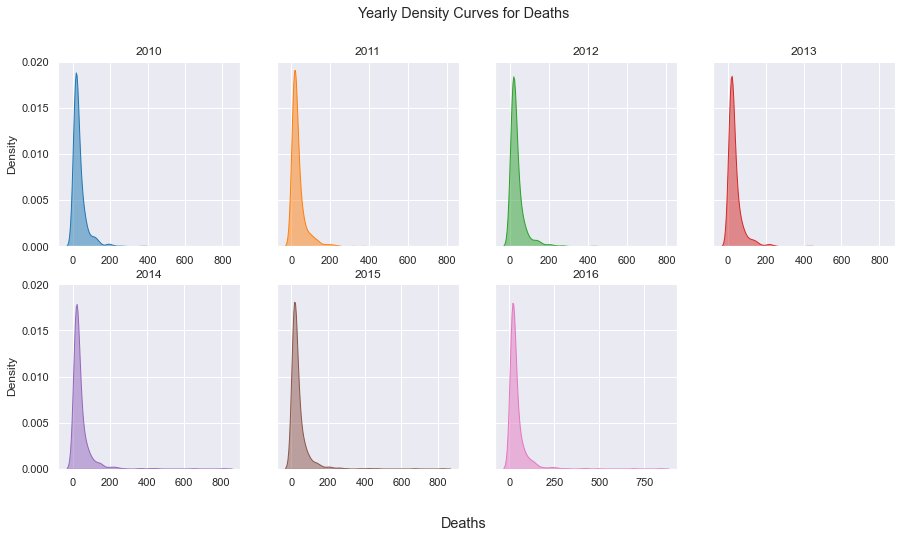

In [114]:
years = sorted(filtered_df['Release Year'].unique()) # get unique year
colors = plt.get_cmap('tab10') # Tableau 10 color scheme
for i, field in enumerate(dependent_fields): # create density plots for all dependent fields
    fig, axes = plt.subplots(2, (len(years) + 1) // 2, figsize=(15, 7.5), sharey=True) # create subplot grid
    field_df = filtered_df[['Release Year', field]].dropna().astype(float)
    for j, ax in enumerate(axes.flatten()):
        if j >= len(years):
            fig.delaxes(ax) # remove all extra axes
        else:
            values = field_df[field_df['Release Year'] == years[j]][field].to_numpy() # get values of dependent variable for current year
            sns.kdeplot(values, shade=True, label=years[j], alpha=0.5, ax=ax, color=colors(j), common_norm=False) # density plot using values and color scheme
            ax.set_title(years[j])
    fig.suptitle('Yearly Density Curves for {}'.format(field))
    fig.supxlabel(field)
    plt.show()